<a href="https://colab.research.google.com/github/alina-bogdanovskaya/ANN-_intro_Nov2022/blob/lesson2/ANN_lesson2_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import random as python_random 
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
(train_imagesi, train_labels), (test_imagesi, testn_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(123)

In [4]:
# Normalize the images.
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [5]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(testn_labels)

In [6]:
model1 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model1.save_weights('model1.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.9138


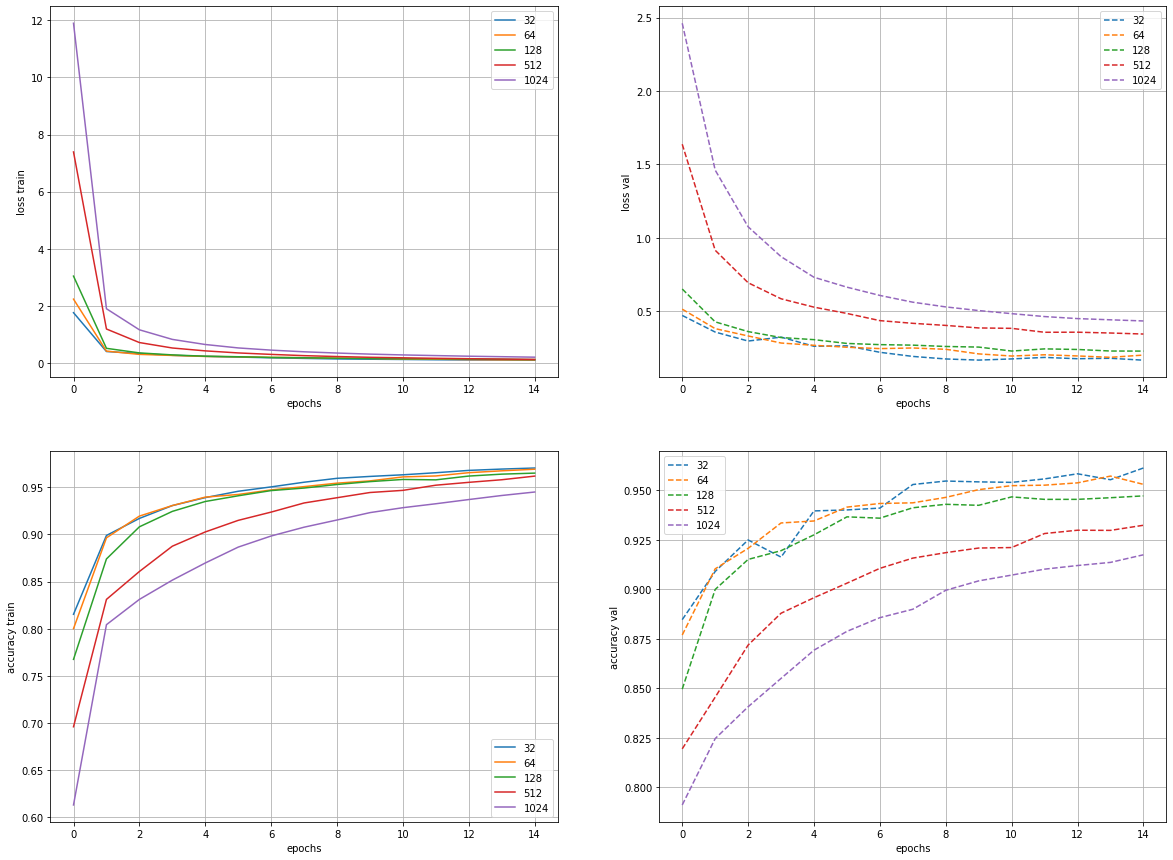

In [7]:
### Влияние batch_size на точность модели

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results1 = []

sizes = [32, 64, 128, 512, 1024]

for size in sizes:
  modeli1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  modeli1.load_weights('model1.h5')

  modeli1.compile(
      optimizer='adam', # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh1 = modeli1.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=size,
      validation_split=0.2,
      verbose=0
  )

  results1.append(modeli1.evaluate(test_images, y_tt))

  ax1.plot(hh1.history['loss'], label=f'{size}')
  ax2.plot(hh1.history['val_loss'], linestyle='dashed', label=f'{size}')
  ax3.plot(hh1.history['accuracy'], label=f'{size}')
  ax4.plot(hh1.history['val_accuracy'], linestyle='dashed', label=f'{size}')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()


313/313 [==============================] - 1s 2ms/step - loss: 2.3078 - accuracy: 0.8368


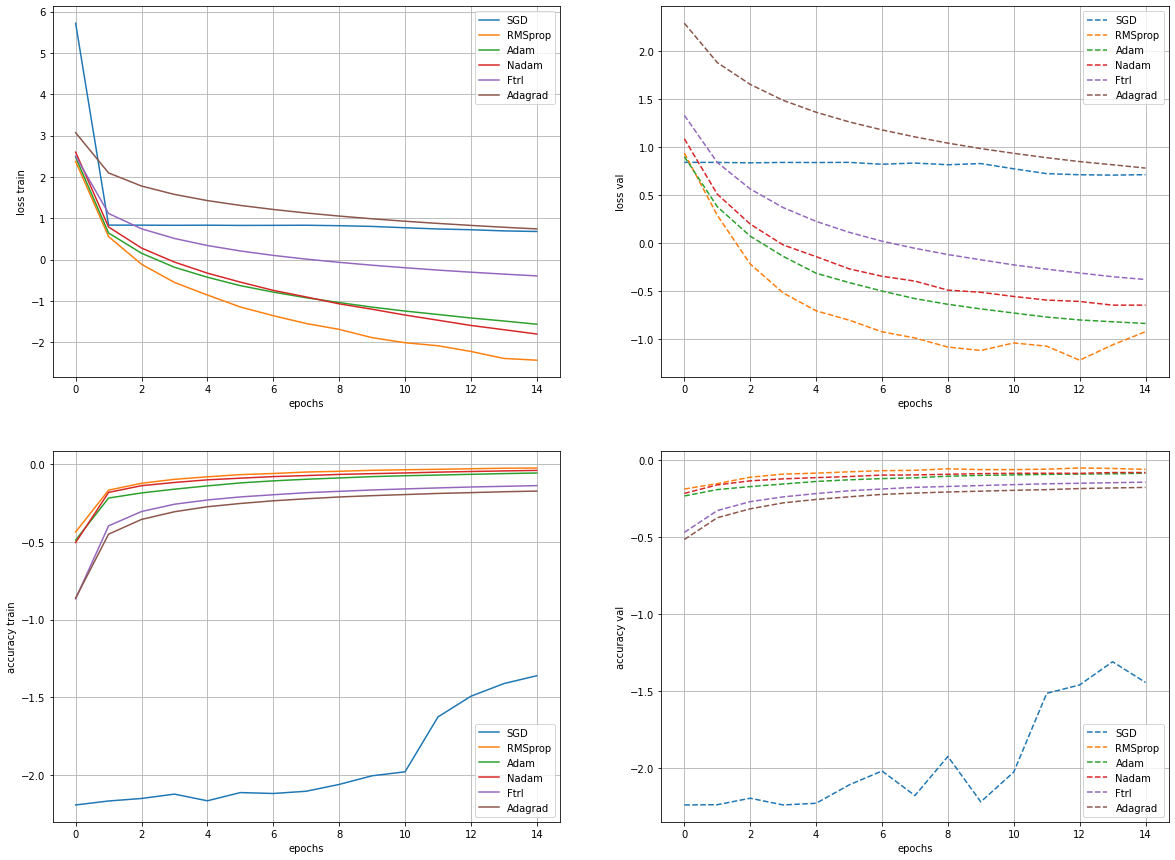

In [8]:
### Влияние optimizer на точность модели

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results1 = []

optimizers = ['SGD', 'RMSprop', 'Adam', 'Nadam', 'Ftrl', 'Adagrad']

for optimizer in optimizers:
  modeli1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  modeli1.load_weights('model1.h5')

  modeli1.compile(
      optimizer=optimizer, # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh1 = modeli1.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=1024,
      validation_split=0.2,
      verbose=0
  )

  results1.append(modeli1.evaluate(test_images, y_tt))

  ax1.plot(np.log(hh1.history['loss']), label=f'{optimizer}')
  ax2.plot(np.log(hh1.history['val_loss']), linestyle='dashed', label=f'{optimizer}')
  ax3.plot(np.log(hh1.history['accuracy']), label=f'{optimizer}')
  ax4.plot(np.log(hh1.history['val_accuracy']), linestyle='dashed', label=f'{optimizer}')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()


In [9]:
model2 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='tanh'),
  Dense(10, activation='softmax'),
])

model2.save_weights('model2.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.9006


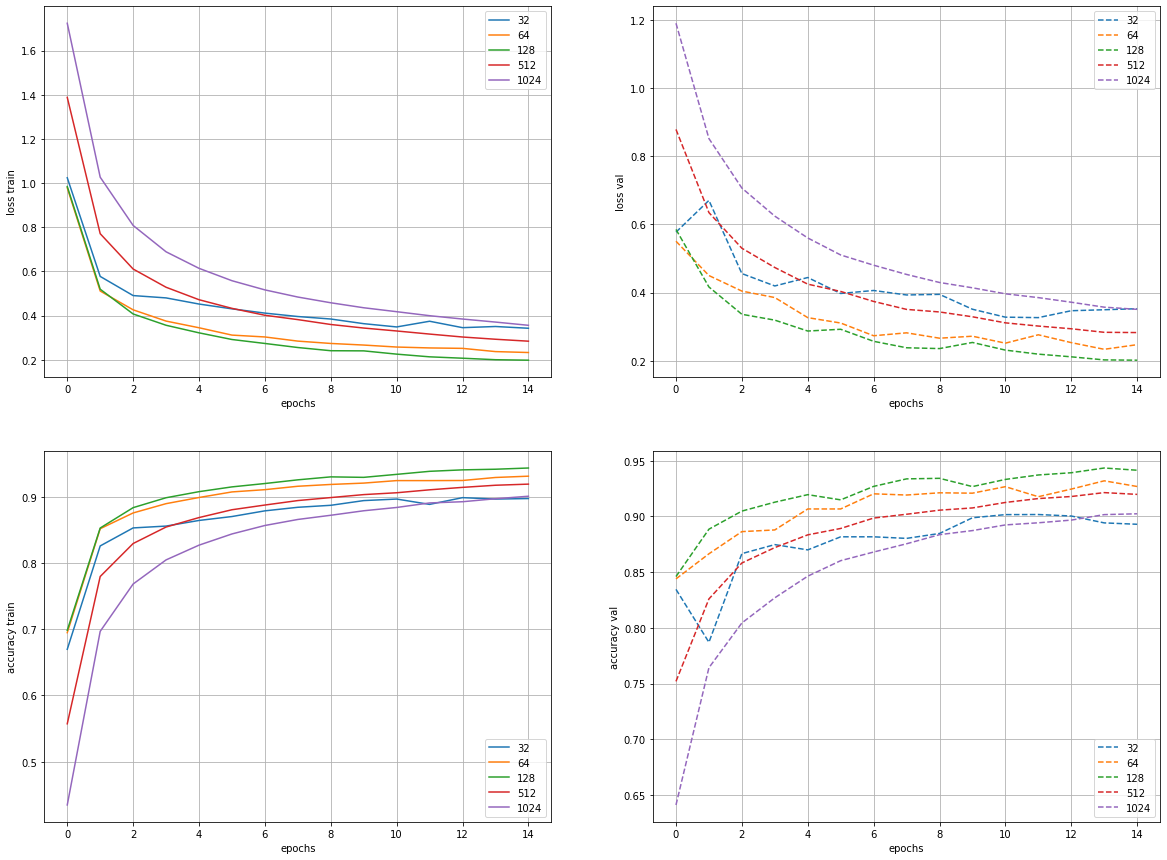

In [10]:
### Влияние batch_size на точность модели при отимизаторе SGD и активаторе внутреннего слоя tanh

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results2 = []

sizes = [32, 64, 128, 512, 1024]

for size in sizes:
  modeli2 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax'),
  ])

  modeli2.load_weights('model2.h5')

  modeli2.compile(
      optimizer='SGD', # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh2 = modeli2.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=size,
      validation_split=0.2,
      verbose=0
  )

  results2.append(modeli2.evaluate(test_images, y_tt))

  ax1.plot(hh2.history['loss'], label=f'{size}')
  ax2.plot(hh2.history['val_loss'], linestyle='dashed', label=f'{size}')
  ax3.plot(hh2.history['accuracy'], label=f'{size}')
  ax4.plot(hh2.history['val_accuracy'], linestyle='dashed', label=f'{size}')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()


313/313 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.9563


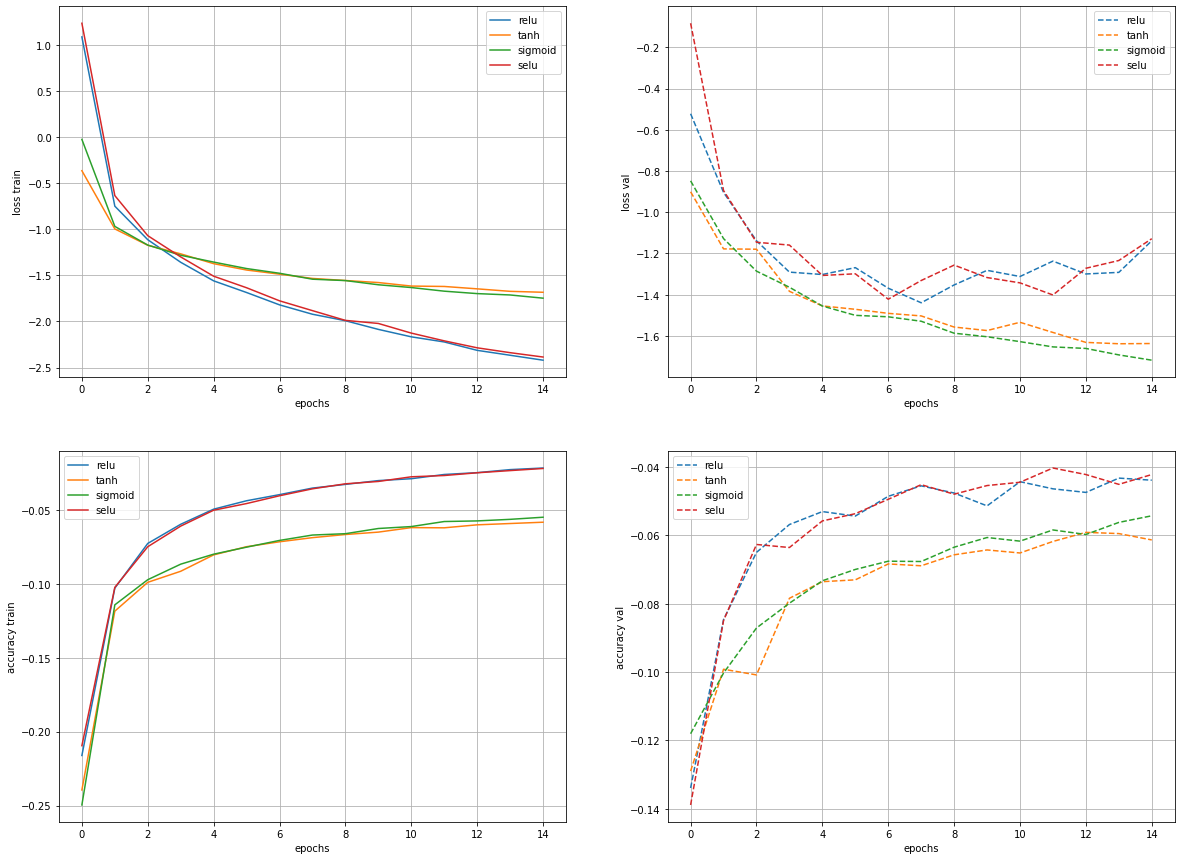

In [11]:
### Влияние activation на точность модели

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results1 = []

activators = ['relu', 'tanh', 'sigmoid', 'selu']

for activator in activators:
  modeli1 = Sequential([
    Dense(64, activation=activator, input_shape=(784,)),
    Dense(64, activation=activator),
    Dense(10, activation='softmax'),
  ])

  modeli1.load_weights('model1.h5')

  modeli1.compile(
      optimizer='RMSprop', # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh1 = modeli1.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=128,
      validation_split=0.2,
      verbose=0
  )

  results1.append(modeli1.evaluate(test_images, y_tt))

  ax1.plot(np.log(hh1.history['loss']), label=f'{activator}')
  ax2.plot(np.log(hh1.history['val_loss']), linestyle='dashed', label=f'{activator}')
  ax3.plot(np.log(hh1.history['accuracy']), label=f'{activator}')
  ax4.plot(np.log(hh1.history['val_accuracy']), linestyle='dashed', label=f'{activator}')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()



313/313 [==============================] - 1s 2ms/step - loss: 0.4541 - accuracy: 0.9647


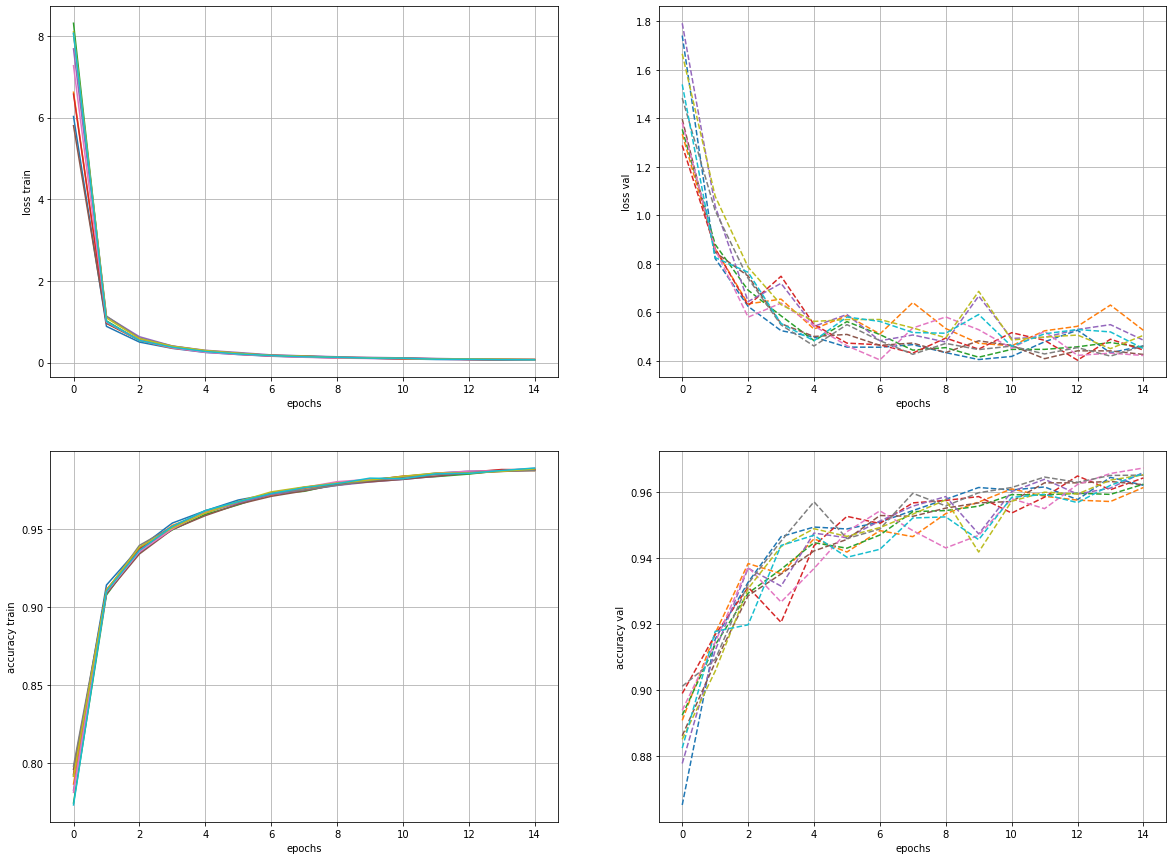

[0.444534620642662, 0.9650600016117096]


In [12]:
### Увеличим количество нейронов в слоях 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results3 = []

for i in range(10):
  model3 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  model3.compile(
      optimizer='RMSprop', # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh3 = model3.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=512,
      validation_split=0.2,
      verbose=0
  )

  results3.append(model3.evaluate(test_images, y_tt))

  ax1.plot(hh3.history['loss'])
  ax2.plot(hh3.history['val_loss'], linestyle='dashed')
  ax3.plot(hh3.history['accuracy'])
  ax4.plot(hh3.history['val_accuracy'], linestyle='dashed')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()

print([sum(sub_list) / len(sub_list) for sub_list in zip(*results3)])

313/313 [==============================] - 2s 6ms/step - loss: 0.1209 - accuracy: 0.9634


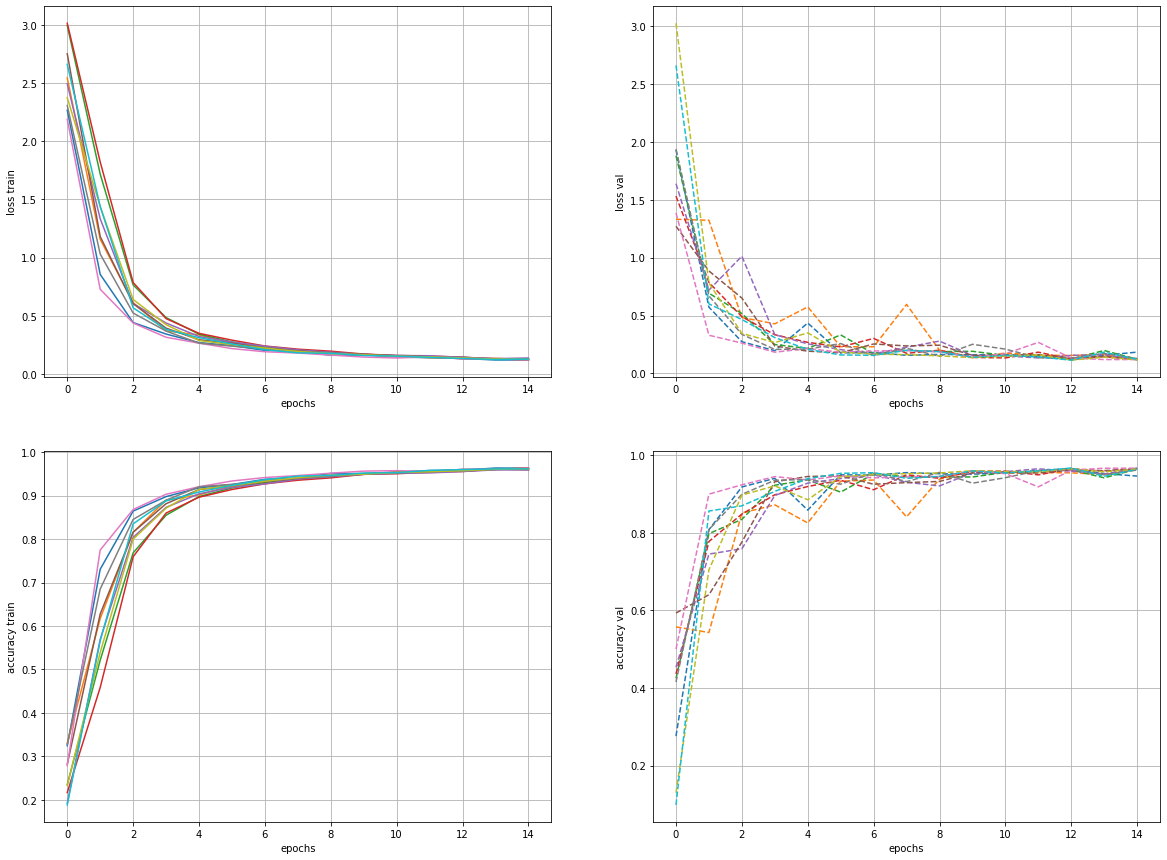

[0.12597602754831314, 0.9625400066375732]


In [14]:
### Увеличим количество слоев 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

results4 = []

for i in range(10):
  model4 = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    Dense(512, activation='tanh'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='selu'),
    Dense(64, activation='elu'),
    Dense(32, activation='exponential'),
    Dense(10, activation='softmax'),
  ])

  model4.compile(
      optimizer='RMSprop', # оптимизатор
      loss='categorical_crossentropy', # функция потерь
      metrics=['accuracy'] # метрика
  )

  hh4 = model4.fit(
      train_images,
      to_categorical(train_labels),
      epochs=15,
      batch_size=1024,
      validation_split=0.2,
      verbose=0
  )

  results4.append(model4.evaluate(test_images, y_tt))

  ax1.plot(hh4.history['loss'])
  ax2.plot(hh4.history['val_loss'], linestyle='dashed')
  ax3.plot(hh4.history['accuracy'])
  ax4.plot(hh4.history['val_accuracy'], linestyle='dashed')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss train')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss val')
ax3.set_xlabel('epochs')
ax3.set_ylabel('accuracy train')
ax4.set_xlabel('epochs')
ax4.set_ylabel('accuracy val')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.show()

print([sum(sub_list) / len(sub_list) for sub_list in zip(*results4)])

1. Оптимизатор SGD плохо показывает себя при активаторах внутреннего слоя relu/selu, при использовании tanh влияиние оптимизатора незначительно. При других оптимизаторах активаторы relu/selu показывают лучшие результаты.
2. Batch_size коррелирует с количеством эпох.
3. Значительное увеличение количества эпох, числа нейронов и количества слоев закономерно приводит к переобучению.